In [48]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [49]:
data= pd.read_csv("DanWood_Data.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,2.138,1.309
NaN,3.421,1.471
NaN,3.597,1.490
NaN,4.340,1.565
NaN,4.882,1.611
NaN,5.660,1.680


In [50]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

b = torch.tensor([1.0,5.0],requires_grad=True)
# b = torch.tensor([0.15,0.008,0.01],requires_grad=True)

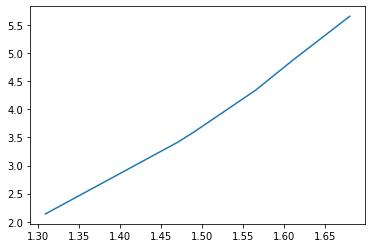

In [51]:
plt.plot(x.numpy(),y.numpy())

In [52]:
## Numerical Differentiation

b = np.array([1.0,5.0]).reshape(-1,1)
# b = np.array([0.7,4]).reshape(-1,1)

x=x.detach().numpy()

u=0.1 #beta multiply identity matrix
beta = 10
V_prev = 0

def f0(b0):
    return  b[0]*np.power(x,b[1])-y.detach().numpy()  
def f1(b1):
    return  b[0]*np.power(x,b[1])-y.detach().numpy()   

start_time = time.perf_counter()   
    
for c in range(290):

    y_pred = b[0]*np.power(x,b[1])
    error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
    d_b0 = derivative(f0,b[0] , dx=1e-6)
    d_b1 = derivative(f1,b[1] , dx=1e-6)
    
     
    jacobian = np.transpose(np.array([d_b0,d_b1]))
    dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
    b -= dParam
    V = np.sum(np.square(error))
    if(V > V_prev):
            u *= beta
    else:
            u /= beta
    V_prev = V
    print("c: ",c," error: ",V," B:", b)
    
    if V <  4.3173084083E-03:
        break
print("time taken to execute: ",time.perf_counter()-start_time)  
print("SD error is", np.std(np.square(error)))

c:  0  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  1  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  2  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  3  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  4  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  5  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  6  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  7  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  8  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  9  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  10  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  11  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  12  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  13  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  14  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  15  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  16  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  17  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  18  error:  149.71921907712195  B: [[1.]
 [5.]]
c:  19  error:  149.71

In [53]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [54]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
start_time = time.perf_counter()
for c in range(200):

    y_pred = b[0]*torch.pow(x,b[1])

    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error<  4.317308409E-03:#7.88539786689E+02:  given residual sum of squares
        break
print("time taken to execute: ",time.perf_counter()-start_time) 
print("SD error is", np.std(np.square(loss.detach().numpy())))

TypeError: pow() received an invalid combination of arguments - got (numpy.ndarray, numpy.ndarray), but expected one of:
 * (Tensor input, Tensor exponent, *, Tensor out)
 * (Number self, Tensor exponent, *, Tensor out)
 * (Tensor input, Number exponent, *, Tensor out)


In [ ]:
plt.plot(y_pred.detach(),'g', y,'r')